In [1]:
from scipy import stats
import pandas as pd
import json

In [2]:
predictions_real_train = '/home/erik.ohara/BrainAge/predictions_real_train.csv'
predictions_real_val= '/home/erik.ohara/BrainAge/predictions_real_val.csv'
predictions_real_test = '/home/erik.ohara/BrainAge/predictions_real_test.csv'
predictions_orig = '/home/erik.ohara/BrainAge/predictions_all-2.csv'
predictions_cf = '/home/erik.ohara/BrainAge/predictions_cf_five.csv'
predictions_all = '/home/erik.ohara/BrainAge/predictions_all-2.csv'
ukbb_path = '/home/erik.ohara/UKBB'
mriqc_generated = ukbb_path + '/generated_images/MRIQC_post_2'
mriqc_original = ukbb_path + '/MRIQC_original_2'

In [3]:
df_real_train = pd.read_csv(predictions_real_train)
df_real_val = pd.read_csv(predictions_real_val)
df_real_test = pd.read_csv(predictions_real_test)

In [11]:
df_ukbb = pd.read_csv(ukbb_path + '/ukbb_img.csv')

In [17]:
df_real_val

,Unnamed: 0,Age,Prediction,ABSError,ABSMEANError,Real_age
EID,,,,,,
1021359,0,70.0,59.033657,10.966343,6.061051,72.0
1022432,1,57.0,59.033321,2.033321,6.938949,70.0
1022898,2,71.0,59.645855,11.354145,7.061051,64.0
1024576,3,50.0,62.109646,12.109646,13.938949,59.0
1024847,4,66.0,72.067284,6.067284,2.061051,61.0
...,...,...,...,...,...,...
6020239,2364,74.0,52.285561,21.714439,10.061051,68.0
6020310,2365,52.0,55.580128,3.580128,11.938949,71.0
6020737,2366,56.0,69.974228,13.974228,7.938949,62.0


In [12]:
df_ukbb.rename(columns={
                        'Age':'Real_age',
                        'eid':'EID'
                        }, inplace=True)

In [14]:
df_real_val = df_real_val.set_index('EID').join(df_ukbb[['EID','Real_age']].set_index('EID'), on='EID', how='left')

In [16]:
df_real_test = df_real_test.set_index('EID').join(df_ukbb[['EID','Real_age']].set_index('EID'), on='EID', how='left')

In [18]:
df_real_val['NewABSError'] = (df_real_val['Prediction']-df_real_val['Real_age']).abs()
df_real_test['NewABSError'] = (df_real_test['Prediction']-df_real_test['Real_age']).abs()

In [4]:
df_real_train['ABSError'].describe()

count    18953.000000
mean         2.281915
std          2.024405
min          0.000011
25%          0.703041
50%          1.685741
75%          3.358997
max         14.316273
Name: ABSError, dtype: float64

In [19]:
df_real_val['NewABSError'].describe()

count    2369.000000
mean        8.220009
std         5.963234
min         0.014481
25%         3.256645
50%         6.994400
75%        12.119011
max        28.558132
Name: NewABSError, dtype: float64

In [20]:
df_real_test['NewABSError'].describe()

count    2370.000000
mean        2.710381
std         2.076066
min         0.001289
25%         1.061237
50%         2.309320
75%         3.828246
max        13.614628
Name: NewABSError, dtype: float64

In [3]:
df_orig = pd.read_csv(predictions_orig)

In [4]:
df_cf = pd.read_csv(predictions_cf)

In [5]:
df_all = pd.read_csv(predictions_all)

In [6]:
df_orig['ABSError'].describe()

count    2370.000000
mean        2.710381
std         2.076066
min         0.001289
25%         1.061237
50%         2.309320
75%         3.828246
max        13.614628
Name: ABSError, dtype: float64

In [7]:
df_cf['ABSError'].describe()

count    2369.000000
mean        6.092791
std         4.521368
min         0.024773
25%         2.455891
50%         5.132488
75%         9.019524
max        37.217100
Name: ABSError, dtype: float64

In [8]:
df_all['ABSError'].describe()

count    2370.000000
mean        2.710381
std         2.076066
min         0.001289
25%         1.061237
50%         2.309320
75%         3.828246
max        13.614628
Name: ABSError, dtype: float64

In [9]:
# only with 56 and 71
df_all[df_all['Age'].isin([56,71])]['ABSError'].describe()

count    296.000000
mean       2.654140
std        2.225834
min        0.008232
25%        1.084892
50%        2.175470
75%        3.878980
max       12.456249
Name: ABSError, dtype: float64

In [9]:
def gaussian_test(values):
    stat1, p1 = stats.shapiro(values)
    stat2, p2 = stats.normaltest(values)
    print(f"Gaussian:\n\t{p1:5f} (Shapiro-Wilk)\n\t{p2:5f} (D'Agostino's)")

In [15]:
gaussian_test(df_orig['Age'])

Gaussian:
	0.000000 (Shapiro-Wilk)
	0.000000 (D'Agostino's)


In [14]:
gaussian_test(df_cf['Prediction'])

Gaussian:
	0.000000 (Shapiro-Wilk)
	0.000000 (D'Agostino's)


In [12]:
# The Mann-Whitney U test
print(stats.mannwhitneyu(x=df_orig['Prediction'], y=df_cf['Prediction']))

MannwhitneyuResult(statistic=2936586.5, pvalue=0.006031133641634525)


In [14]:
df_orig

,Unnamed: 0,EID,Age,Prediction,ABSError,ABSMEANError
0,0,1036335,62.0,67.047562,5.047562,1.938949
1,1,1044817,77.0,72.991440,4.008560,13.061051
2,2,1062520,62.0,67.697449,5.697449,1.938949
3,3,1101447,71.0,73.093315,2.093315,7.061051
4,4,1107106,68.0,72.616402,4.616402,4.061051
...,...,...,...,...,...,...
195,195,5974011,65.0,68.079605,3.079605,1.061051
196,196,5977910,59.0,59.051182,0.051182,4.938949
197,197,5978533,58.0,59.226170,1.226170,5.938949
198,198,5983747,51.0,56.411053,5.411053,12.938949


In [15]:
df_orig.rename(columns={"Age": "Original_Age", "Prediction": "Original_Prediction"},inplace=True)

In [16]:
df_cf_analysis = df_cf.set_index('EID').join(df_orig[['EID','Original_Age','Original_Prediction']].set_index('EID'), on='EID', how='left')

In [17]:
df_cf_analysis['Abs_Age_diff'] = abs(df_cf_analysis['Age']-df_cf_analysis['Original_Age'])

In [18]:
df_cf_analysis['Age_diff'] = df_cf_analysis['Age']-df_cf_analysis['Original_Age']

In [19]:
df_cf_analysis['Prediction_diff'] = df_cf_analysis['Prediction']-df_cf_analysis['Original_Prediction']

In [20]:
df_cf_analysis['right_direction_multi'] = df_cf_analysis['Age_diff']*df_cf_analysis['Prediction_diff']
df_cf_analysis['right_direction'] = df_cf_analysis['right_direction_multi'] > 0

In [21]:
df_cf_analysis

,Unnamed: 0,Age,Prediction,ABSError,ABSMEANError,Original_Age,Original_Prediction,Abs_Age_diff,Age_diff,Prediction_diff,right_direction_multi,right_direction
EID,,,,,,,,,,,,
1036335,0,56.0,67.088928,11.088928,7.5,62.0,67.047562,6.0,-6.0,0.041367,-0.248199,False
1044817,1,71.0,71.533348,0.533348,7.5,77.0,72.991440,6.0,-6.0,-1.458092,8.748550,True
1062520,2,71.0,67.820038,3.179962,7.5,62.0,67.697449,9.0,9.0,0.122589,1.103302,True
1101447,3,71.0,73.142029,2.142029,7.5,71.0,73.093315,0.0,0.0,0.048714,0.000000,False
1107106,4,56.0,70.591324,14.591324,7.5,68.0,72.616402,12.0,-12.0,-2.025078,24.300934,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5974011,195,56.0,66.251808,10.251808,7.5,65.0,68.079605,9.0,-9.0,-1.827797,16.450172,True
5977910,196,56.0,58.446636,2.446636,7.5,59.0,59.051182,3.0,-3.0,-0.604546,1.813637,True
5978533,197,71.0,62.962856,8.037144,7.5,58.0,59.226170,13.0,13.0,3.736687,48.576927,True


In [46]:
df_cf_analysis[df_cf_analysis['Age_diff'] == 0]

,Unnamed: 0,Age,Prediction,ABSError,ABSMEANError,Original_Age,Original_Prediction,Abs_Age_diff,Age_diff,Prediction_diff,right_direction_multi,right_direction,cjv_generated,cnr_generated
EID,,,,,,,,,,,,,,
1101447,3,71.0,73.142029,2.142029,7.5,71.0,73.093315,0.0,0.0,0.048714,0.0,False,0.736429,0.569374
2469040,68,71.0,70.448822,0.551178,7.5,71.0,71.459869,0.0,0.0,-1.011047,-0.0,False,0.695915,0.656125
2881946,81,56.0,60.713863,4.713863,7.5,56.0,60.586933,0.0,0.0,0.126930,0.0,False,0.659756,0.678079
3407684,98,56.0,66.675735,10.675735,7.5,56.0,66.575722,0.0,0.0,0.100014,0.0,False,0.717047,0.659472
3797869,114,71.0,71.107971,0.107971,7.5,71.0,70.924591,0.0,0.0,0.183380,0.0,False,0.703617,0.618328
4780256,144,56.0,60.761383,4.761383,7.5,56.0,60.617279,0.0,0.0,0.144104,0.0,False,0.630044,0.676769
5088060,153,71.0,66.011017,4.988983,7.5,71.0,65.790253,0.0,0.0,0.220764,0.0,False,0.631020,0.697553
5321365,163,71.0,71.238503,0.238503,7.5,71.0,71.100128,0.0,0.0,0.138374,0.0,False,0.762640,0.594835


In [22]:
len(df_cf_analysis[df_cf_analysis['right_direction'] == True])/len(df_cf_analysis)

0.94

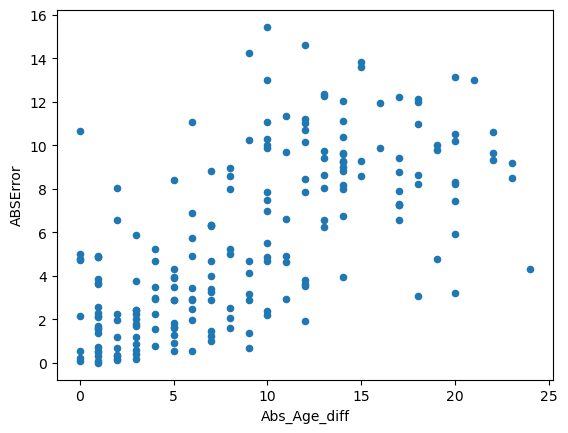

In [23]:
ax1 = df_cf_analysis.plot.scatter(x='Abs_Age_diff', y='ABSError')

In [49]:
df_cf_analysis['close_to_cf'] = abs(df_cf_analysis['Prediction'] - df_cf_analysis['Age']) < abs(df_cf_analysis['Prediction'] - df_cf_analysis['Original_Age'])

In [50]:
len(df_cf_analysis[df_cf_analysis['close_to_cf'] == True])/len(df_cf_analysis)

0.46

##  Getting IQMs

In [25]:
df_cf

,Unnamed: 0,EID,Age,Prediction,ABSError,ABSMEANError
0,0,1036335,56.0,67.088928,11.088928,7.5
1,1,1044817,71.0,71.533348,0.533348,7.5
2,2,1062520,71.0,67.820038,3.179962,7.5
3,3,1101447,71.0,73.142029,2.142029,7.5
4,4,1107106,56.0,70.591324,14.591324,7.5
...,...,...,...,...,...,...
195,195,5974011,56.0,66.251808,10.251808,7.5
196,196,5977910,56.0,58.446636,2.446636,7.5
197,197,5978533,71.0,62.962856,8.037144,7.5
198,198,5983747,71.0,62.762112,8.237888,7.5


In [27]:
subjects_eid = df_cf['EID'].to_numpy()

In [32]:
mriqc_generated

'/home/miplab/ukbb/generated_images/MRIQC_post_2'

In [35]:
iqm_eids = []
iqm_generated = []

for each_eid in subjects_eid:
    each_eid = str(int(each_eid))
    try:
        with open(mriqc_generated + f"/sub-{each_eid}/ses-01/anat/sub-{each_eid}_ses-01_acq-ShortExample_run-01_T1w.json", 'r') as f_generated:
            json_file = json.load(f_generated)
            json_file['eid'] = each_eid
            iqm_generated.append(json_file)
            iqm_eids.append(each_eid)
    except Exception as e:
        print(e)
        print(f"{each_eid} not in IQM generated")
print(len(iqm_generated))
df_iqm_generated = pd.DataFrame.from_dict(iqm_generated)
df_iqm_generated

[Errno 2] No such file or directory: '/home/miplab/ukbb/generated_images/MRIQC_post_2/sub-1741665/ses-01/anat/sub-1741665_ses-01_acq-ShortExample_run-01_T1w.json'
1741665 not in IQM generated
199


,bids_meta,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,fwhm_z,icvs_csf,...,summary_wm_median,summary_wm_n,summary_wm_p05,summary_wm_p95,summary_wm_stdv,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max,eid
0,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.636166,0.696719,0.781518,-1.0,5.057140,4.84203,5.32171,5.00768,0.230699,...,976.697079,605541.882523,832.755063,1056.358615,67.155890,0.271492,0.514916,0.549414,0.858981,1036335
1,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.741624,0.621527,0.780730,-1.0,4.734507,4.59310,5.20065,4.40977,0.222226,...,968.034860,667559.683602,779.461964,1070.766094,90.141085,0.246980,0.479093,0.498370,0.827922,1044817
2,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.642051,0.683336,0.793480,-1.0,4.837930,5.01794,5.25028,4.24557,0.230904,...,979.878234,625995.386719,830.198266,1060.208636,69.276003,0.258228,0.507420,0.546802,0.853482,1062520
3,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.736429,0.569374,0.783764,-1.0,4.923370,4.61356,5.03148,5.12507,0.227327,...,971.876828,633391.623209,825.742532,1057.192454,70.357309,0.248762,0.487715,0.536108,0.853878,1101447
4,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.676009,0.699668,0.779635,-1.0,4.412413,4.53454,4.95221,3.75049,0.232379,...,970.601636,618543.546840,787.537463,1060.485032,84.115896,0.254611,0.505042,0.538237,0.851910,1107106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.618151,0.703878,0.785859,-1.0,4.513857,4.57997,4.87314,4.08846,0.230455,...,984.173611,616564.203738,842.495454,1060.348101,65.129600,0.268621,0.515442,0.537675,0.870990,5974011
195,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.613789,0.702476,0.791668,-1.0,5.430377,5.23567,5.46239,5.59307,0.235890,...,973.003008,608957.232622,805.236196,1050.582179,74.698477,0.261553,0.523892,0.547279,0.867128,5977910
196,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.654595,0.738114,0.769848,-1.0,4.852923,5.02968,5.37426,4.15483,0.226641,...,971.495565,615569.507458,801.115760,1057.248906,77.837819,0.263440,0.518018,0.534585,0.859396,5978533
197,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.606788,0.690857,0.796849,-1.0,4.196987,4.55468,4.66227,3.37401,0.233968,...,986.613929,614352.986549,865.826426,1055.266321,57.042191,0.266576,0.517562,0.542325,0.870498,5983747


In [36]:
iqm_original = []
for each_eid in iqm_eids:
    with open(mriqc_original + f"/sub-{each_eid}/ses-01/anat/sub-{each_eid}_ses-01_acq-ShortExample_run-01_T1w.json", 'r') as f_original:
        json_file = json.load(f_original)
        json_file['eid'] = each_eid
        iqm_original.append(json_file)
print(len(iqm_original))
df_iqm_original = pd.DataFrame.from_dict(iqm_original)
df_iqm_original

199


,bids_meta,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,fwhm_z,icvs_csf,...,summary_wm_median,summary_wm_n,summary_wm_p05,summary_wm_p95,summary_wm_stdv,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max,eid
0,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.556551,1.161088,0.854696,1.428764,5.403793,5.05454,5.53446,5.62238,0.234306,...,962.749469,586073.108951,730.066655,1058.767389,100.992581,0.256186,0.516731,0.555590,0.855716,1036335
1,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.720138,0.837912,0.849066,1.221984,5.247380,4.79580,5.48427,5.46207,0.222329,...,928.843871,647489.301879,639.574866,1056.071637,132.865442,0.219575,0.496858,0.511607,0.811758,1044817
2,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.563732,1.117477,0.857885,1.666768,5.345983,5.15648,5.26214,5.61933,0.237243,...,965.136894,598703.407509,763.616400,1053.720197,88.740299,0.250973,0.521178,0.559860,0.859727,1062520
3,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.636133,0.992517,0.856443,1.239803,5.040827,4.73081,5.13082,5.26085,0.229186,...,943.304126,609986.717896,683.547409,1051.701620,114.714502,0.230416,0.506926,0.555305,0.835439,1101447
4,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.602626,1.038299,0.850516,1.352571,5.059347,4.79678,5.29787,5.08339,0.229812,...,947.846979,606235.208588,661.336067,1057.729405,124.268608,0.239939,0.507053,0.544387,0.831132,1107106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.532095,1.134688,0.854110,1.325906,4.964833,4.77916,5.05991,5.05543,0.235883,...,968.186558,596682.308665,750.398123,1056.213502,93.671627,0.258201,0.521644,0.538757,0.866587,5974011
195,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.526797,1.226296,0.848843,1.566152,5.576247,5.36703,5.52619,5.83552,0.244443,...,960.571574,581873.593984,697.917233,1050.136313,110.170869,0.247274,0.532739,0.554627,0.869188,5977910
196,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.580538,1.210171,0.849430,1.215232,5.487313,5.25753,5.46708,5.73733,0.234028,...,952.187556,588865.278406,703.580577,1061.023884,109.862815,0.233755,0.522550,0.549884,0.847760,5978533
197,"{'acq_id': 'ShortExample', 'dataset': '<unset>...",0.544496,1.223171,0.845757,1.869902,4.893957,4.82546,4.82498,5.03143,0.243865,...,972.271892,584622.573394,803.230025,1062.443533,77.946907,0.249721,0.526152,0.559942,0.864031,5983747


In [37]:
df_iqm_generated.rename(columns={"eid": "EID", "cjv": "cjv_generated", "cnr": "cnr_generated"},inplace=True)

In [41]:
df_iqm_generated['EID']

bids_meta           object
cjv_generated      float64
cnr_generated      float64
efc                float64
fber               float64
                    ...   
tpm_overlap_csf    float64
tpm_overlap_gm     float64
tpm_overlap_wm     float64
wm2max             float64
EID                 object
Length: 71, dtype: object

In [42]:
df_cf_analysis = df_cf_analysis.join(df_iqm_generated[['EID','cjv_generated','cnr_generated']].astype({'EID': 'int64'}).set_index('EID'), 
                                     on='EID', how='left')

In [43]:
df_cf_analysis

,Unnamed: 0,Age,Prediction,ABSError,ABSMEANError,Original_Age,Original_Prediction,Abs_Age_diff,Age_diff,Prediction_diff,right_direction_multi,right_direction,cjv_generated,cnr_generated
EID,,,,,,,,,,,,,,
1036335,0,56.0,67.088928,11.088928,7.5,62.0,67.047562,6.0,-6.0,0.041367,-0.248199,False,0.636166,0.696719
1044817,1,71.0,71.533348,0.533348,7.5,77.0,72.991440,6.0,-6.0,-1.458092,8.748550,True,0.741624,0.621527
1062520,2,71.0,67.820038,3.179962,7.5,62.0,67.697449,9.0,9.0,0.122589,1.103302,True,0.642051,0.683336
1101447,3,71.0,73.142029,2.142029,7.5,71.0,73.093315,0.0,0.0,0.048714,0.000000,False,0.736429,0.569374
1107106,4,56.0,70.591324,14.591324,7.5,68.0,72.616402,12.0,-12.0,-2.025078,24.300934,True,0.676009,0.699668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5974011,195,56.0,66.251808,10.251808,7.5,65.0,68.079605,9.0,-9.0,-1.827797,16.450172,True,0.618151,0.703878
5977910,196,56.0,58.446636,2.446636,7.5,59.0,59.051182,3.0,-3.0,-0.604546,1.813637,True,0.613789,0.702476
5978533,197,71.0,62.962856,8.037144,7.5,58.0,59.226170,13.0,13.0,3.736687,48.576927,True,0.654595,0.738114


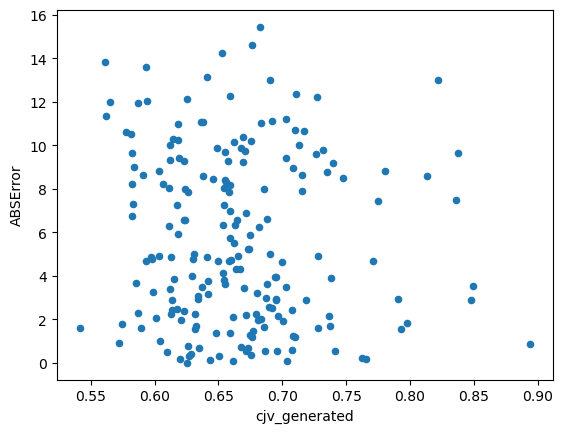

In [44]:
ax2 = df_cf_analysis.plot.scatter(x='cjv_generated', y='ABSError')

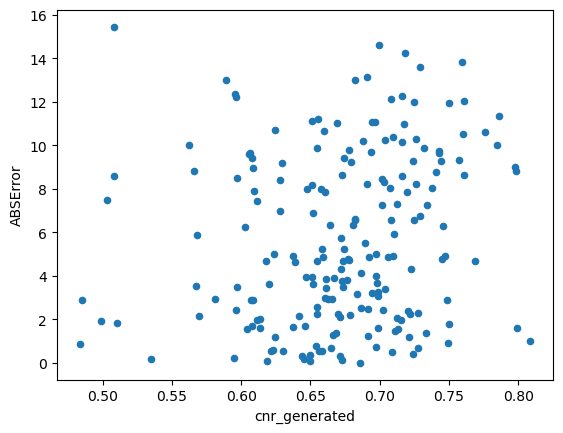

In [45]:
ax2 = df_cf_analysis.plot.scatter(x='cnr_generated', y='ABSError')